In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib._color_data as mcd

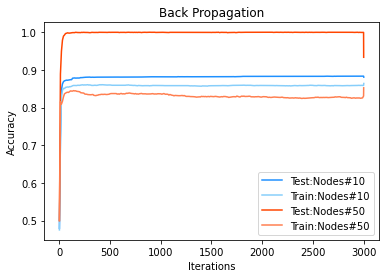

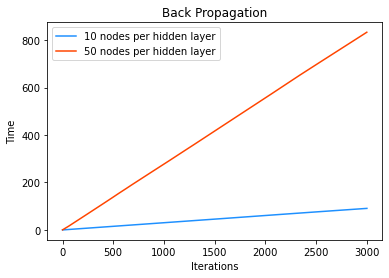

In [7]:
BP_INFILE = ['./NN_OUTPUT/BACKPROP_LOG_10.txt','./NN_OUTPUT/BACKPROP_LOG_50.txt']
FILES=[BP_INFILE[0],BP_INFILE[1]]
y_train_plot = []
y_test_plot = []
y_time_plot = []
x_plot = []
legends = ['Test:Nodes#10','Train:Nodes#10','Test:Nodes#50','Train:Nodes#50']
#legends =['Train Mate=10, Mutate=10', 'Train Mate=10, Mutate=20', 'Train Mate=20, Mutate=10', 'Train Mate=20, Mutate=20']
#legends =['CE=0.7', 'CE=0.15', 'CE=0.35', 'CE=0.55', 'CE=0.95']
color1=['dodgerblue','orangered']
color2=['lightskyblue','coral']
'''
color1=['#ff0000','#b0ff00','#00bfff','#bf00ff', '#000000']
color2=['#ff8000','#40ff00','#0040ff','#8f00ff', '#404040']
'''
for file in range(len(FILES)):
    trials = 5
    x_axis = []
    y_train_axis = []
    y_test_axis = []
    y_time_axis = []
    trials_end = [0]
    maxdiff = 0
    maxdiff_index = 0
    with open(FILES[file], 'r') as f:
        data = f.readlines()
        start = 1
        for n, line in enumerate(data[start:], 1):
            column=line.rstrip().split(",")
            x_axis.append(float(column[0]))
            y_train_axis.append(float(column[4]))
            y_test_axis.append(float(column[6]))
            if column[-1]=='optimal':
                trials_end.append(n)
                y_time_axis.append(float(column[-2]))
            else:
                y_time_axis.append(float(column[-1]))

        for i in range(len(trials_end)-1):
            diff=trials_end[i+1]-trials_end[i]
            if maxdiff<diff:
                maxdiff=diff
                maxdiff_index=trials_end[i]

        y_train=[]
        y_test=[]
        y_time=[]

        
        for i in range(trials-1):
            y_train.append(y_train_axis[trials_end[i]:trials_end[i + 1]] + [y_train_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_test.append(y_test_axis[trials_end[i]:trials_end[i + 1]] + [y_test_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_time.append(y_time_axis[trials_end[i]:trials_end[i + 1]] + [y_time_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        y_time = np.array(y_time)
        x=np.array(x_axis[maxdiff_index:maxdiff_index+maxdiff])
        y_train = np.mean(y_train, axis=0)
        y_test = np.mean(y_test, axis=0)
        y_time = np.mean(y_time, axis=0)
        x_plot.append(x)
        y_train_plot.append(y_train)
        y_test_plot.append(y_test)
        y_time_plot.append(y_time)

        plt.figure(1) 
        plt.plot(x_plot[file], y_train_plot[file], color1[file])
        plt.plot(x_plot[file], y_test_plot[file], color2[file])
        plt.title('Back Propagation')
        plt.ylabel('Accuracy')
        plt.xlabel('Iterations')
        plt.legend(legends)
        
        plt.figure(2) 
        plt.plot(x_plot[file], y_time_plot[file], color1[file])
        plt.title('Back Propagation')
        plt.ylabel('Time')
        plt.xlabel('Iterations')
        plt.legend(['10 nodes per hidden layer','50 nodes per hidden layer'])


plt.show()

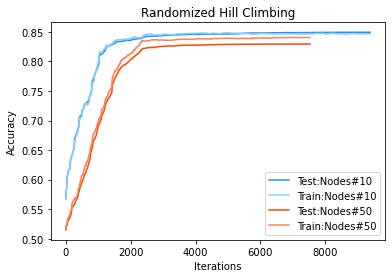

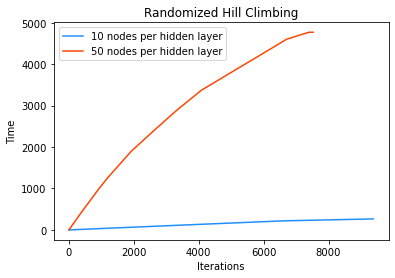

In [8]:
RHC_INFILE = ['./NN_OUTPUT/RHC_LOG_10.txt','./NN_OUTPUT/RHC_LOG_50.txt']
FILES=[RHC_INFILE[0],RHC_INFILE[1]]
y_train_plot = []
y_test_plot = []
y_time_plot = []
x_plot = []
legends = ['Test:Nodes#10','Train:Nodes#10','Test:Nodes#50','Train:Nodes#50']
#legends =['Train Mate=10, Mutate=10', 'Train Mate=10, Mutate=20', 'Train Mate=20, Mutate=10', 'Train Mate=20, Mutate=20']
#legends =['CE=0.7', 'CE=0.15', 'CE=0.35', 'CE=0.55', 'CE=0.95']
color1=['dodgerblue','orangered']
color2=['lightskyblue','coral']
'''
color1=['#ff0000','#b0ff00','#00bfff','#bf00ff', '#000000']
color2=['#ff8000','#40ff00','#0040ff','#8f00ff', '#404040']
'''
for file in range(len(FILES)):
    trials = 5
    x_axis = []
    y_train_axis = []
    y_test_axis = []
    y_time_axis = []
    trials_end = [0]
    maxdiff = 0
    maxdiff_index = 0
    with open(FILES[file], 'r') as f:
        data = f.readlines()
        start = 1
        for n, line in enumerate(data[start:], 1):
            column=line.rstrip().split(",")
            x_axis.append(float(column[0]))
            y_train_axis.append(float(column[4]))
            y_test_axis.append(float(column[6]))
            if column[-1]=='optimal':
                trials_end.append(n)
                y_time_axis.append(float(column[-2]))
            else:
                y_time_axis.append(float(column[-1]))

        for i in range(len(trials_end)-1):
            diff=trials_end[i+1]-trials_end[i]
            if maxdiff<diff:
                maxdiff=diff
                maxdiff_index=trials_end[i]

        y_train=[]
        y_test=[]
        y_time=[]

        
        for i in range(trials-1):
            y_train.append(y_train_axis[trials_end[i]:trials_end[i + 1]] + [y_train_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_test.append(y_test_axis[trials_end[i]:trials_end[i + 1]] + [y_test_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_time.append(y_time_axis[trials_end[i]:trials_end[i + 1]] + [y_time_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        y_time = np.array(y_time)
        x=np.array(x_axis[maxdiff_index:maxdiff_index+maxdiff])
        y_train = np.mean(y_train, axis=0)
        y_test = np.mean(y_test, axis=0)
        y_time = np.mean(y_time, axis=0)
        x_plot.append(x)
        y_train_plot.append(y_train)
        y_test_plot.append(y_test)
        y_time_plot.append(y_time)

        plt.figure(1) 
        plt.plot(x_plot[file], y_train_plot[file], color1[file])
        plt.plot(x_plot[file], y_test_plot[file], color2[file])
        plt.title('Randomized Hill Climbing')
        plt.ylabel('Accuracy')
        plt.xlabel('Iterations')
        plt.legend(legends)
        
        plt.figure(2) 
        plt.plot(x_plot[file], y_time_plot[file], color1[file])
        plt.title('Randomized Hill Climbing')
        plt.ylabel('Time')
        plt.xlabel('Iterations')
        plt.legend(['10 nodes per hidden layer','50 nodes per hidden layer'])


plt.show()

0.85075
0.848
0.8472500000000001
0.846
0.83175


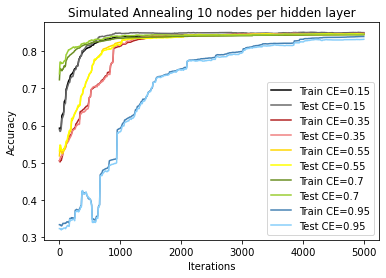

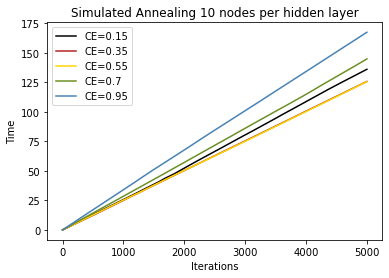

0.846
0.8475
0.84725
0.84875
0.83875


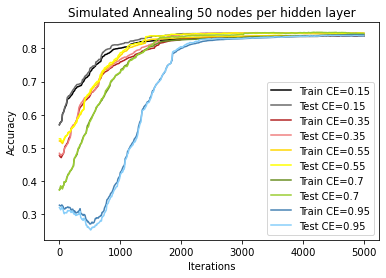

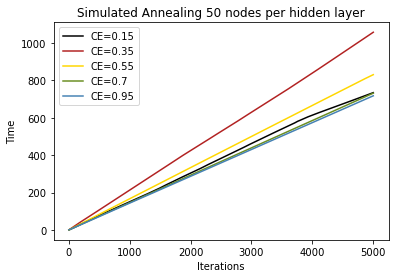

In [10]:
SA_INFILE = [
             './NN_OUTPUT/SA0.15_LOG_10.txt',
             './NN_OUTPUT/SA0.15_LOG_50.txt',
             './NN_OUTPUT/SA0.35_LOG_10.txt',
             './NN_OUTPUT/SA0.35_LOG_50.txt',
             './NN_OUTPUT/SA0.55_LOG_10.txt',
             './NN_OUTPUT/SA0.55_LOG_50.txt',
             './NN_OUTPUT/SA0.7_LOG_10.txt',
             './NN_OUTPUT/SA0.7_LOG_50.txt',
             './NN_OUTPUT/SA0.95_LOG_10.txt',
             './NN_OUTPUT/SA0.95_LOG_50.txt']
FILES=[SA_INFILE[0],SA_INFILE[2],SA_INFILE[4],SA_INFILE[6],SA_INFILE[8]]
y_train_plot = []
y_test_plot = []
y_time_plot = []
x_plot = []
legends =['Train CE=0.15', 'Test CE=0.15',
          'Train CE=0.35', 'Test CE=0.35',
          'Train CE=0.55', 'Test CE=0.55',
          'Train CE=0.7',  'Test CE=0.7',
          'Train CE=0.95', 'Test CE=0.95']
legends2 = ['CE=0.15', 'CE=0.35', 'CE=0.55','CE=0.7',  'CE=0.95']
color1=['black','firebrick','gold','olivedrab', 'steelblue']
color2=['dimgray','lightcoral','yellow','yellowgreen', 'lightskyblue']
'''
color1=['#ff0000','#b0ff00','#00bfff','#bf00ff', '#000000']
color2=['#ff8000','#40ff00','#0040ff','#8f00ff', '#404040']
'''
for file in range(len(FILES)):

    trials = 5
    x_axis = []
    y_train_axis = []
    y_test_axis = []
    y_time_axis = []
    trials_end = [0]
    maxdiff = 0
    maxdiff_index = 0
    with open(FILES[file], 'r') as f:
        data = f.readlines()
        start = 1
        for n, line in enumerate(data[start:], 1):
            column=line.rstrip().split(",")
            x_axis.append(float(column[0]))
            y_train_axis.append(float(column[4]))
            y_test_axis.append(float(column[6]))
            if column[-1]=='optimal':
                trials_end.append(n)
                y_time_axis.append(float(column[-2]))
            else:
                y_time_axis.append(float(column[-1]))

        for i in range(len(trials_end)-1):
            diff=trials_end[i+1]-trials_end[i]
            if maxdiff<diff:
                maxdiff=diff
                maxdiff_index=trials_end[i]

        y_train=[]
        y_test=[]
        y_time=[]

        for i in range(trials-1):
            y_train.append(y_train_axis[trials_end[i]:trials_end[i + 1]] + [y_train_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_test.append(y_test_axis[trials_end[i]:trials_end[i + 1]] + [y_test_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_time.append(y_time_axis[trials_end[i]:trials_end[i + 1]] + [y_time_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])        
        
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        y_time = np.array(y_time)
        x=np.array(x_axis[maxdiff_index:maxdiff_index+maxdiff])
        y_train = np.mean(y_train, axis=0)
        y_test = np.mean(y_test, axis=0)
        y_time = np.mean(y_time, axis=0)
        x_plot.append(x)
        y_train_plot.append(y_train)
        y_test_plot.append(y_test)
        y_time_plot.append(y_time)

        print(max(y_test_plot[file]))
        
        plt.figure(1) 
        plt.plot(x_plot[file], y_train_plot[file], color1[file])
        plt.plot(x_plot[file], y_test_plot[file], color2[file])
        plt.title('Simulated Annealing 10 nodes per hidden layer')
        plt.ylabel('Accuracy')
        plt.xlabel('Iterations')
        plt.legend(legends)
        
        plt.figure(2) 
        plt.plot(x_plot[file], y_time_plot[file], color1[file])
        plt.title('Simulated Annealing 10 nodes per hidden layer')
        plt.ylabel('Time')
        plt.xlabel('Iterations')
        plt.legend(legends2)
plt.show()

FILES=[SA_INFILE[1],SA_INFILE[3],SA_INFILE[5],SA_INFILE[7],SA_INFILE[9]]
y_train_plot = []
y_test_plot = []
y_time_plot = []
x_plot = []
legends =['Train CE=0.15', 'Test CE=0.15',
          'Train CE=0.35', 'Test CE=0.35',
          'Train CE=0.55', 'Test CE=0.55',
          'Train CE=0.7',  'Test CE=0.7',
          'Train CE=0.95', 'Test CE=0.95']
legends2 = ['CE=0.15', 'CE=0.35', 'CE=0.55','CE=0.7',  'CE=0.95']
color1=['black','firebrick','gold','olivedrab', 'steelblue']
color2=['dimgray','lightcoral','yellow','yellowgreen', 'lightskyblue']
'''
color1=['#ff0000','#b0ff00','#00bfff','#bf00ff', '#000000']
color2=['#ff8000','#40ff00','#0040ff','#8f00ff', '#404040']
'''
for file in range(len(FILES)):

    trials = 5
    x_axis = []
    y_train_axis = []
    y_test_axis = []
    y_time_axis = []
    trials_end = [0]
    maxdiff = 0
    maxdiff_index = 0
    with open(FILES[file], 'r') as f:
        data = f.readlines()
        start = 1
        for n, line in enumerate(data[start:], 1):
            column=line.rstrip().split(",")
            x_axis.append(float(column[0]))
            y_train_axis.append(float(column[4]))
            y_test_axis.append(float(column[6]))
            if column[-1]=='optimal':
                trials_end.append(n)
                y_time_axis.append(float(column[-2]))
            else:
                y_time_axis.append(float(column[-1]))

        for i in range(len(trials_end)-1):
            diff=trials_end[i+1]-trials_end[i]
            if maxdiff<diff:
                maxdiff=diff
                maxdiff_index=trials_end[i]

        y_train=[]
        y_test=[]
        y_time=[]

        for i in range(trials-1):
            y_train.append(y_train_axis[trials_end[i]:trials_end[i + 1]] + [y_train_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_test.append(y_test_axis[trials_end[i]:trials_end[i + 1]] + [y_test_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_time.append(y_time_axis[trials_end[i]:trials_end[i + 1]] + [y_time_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])        
        
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        y_time = np.array(y_time)
        x=np.array(x_axis[maxdiff_index:maxdiff_index+maxdiff])
        y_train = np.mean(y_train, axis=0)
        y_test = np.mean(y_test, axis=0)
        y_time = np.mean(y_time, axis=0)
        x_plot.append(x)
        y_train_plot.append(y_train)
        y_test_plot.append(y_test)
        y_time_plot.append(y_time)

        print(max(y_test_plot[file]))
        
        plt.figure(1) 
        plt.plot(x_plot[file], y_train_plot[file], color1[file])
        plt.plot(x_plot[file], y_test_plot[file], color2[file])
        plt.title('Simulated Annealing 50 nodes per hidden layer')
        plt.ylabel('Accuracy')
        plt.xlabel('Iterations')
        plt.legend(legends)
        
        plt.figure(2) 
        plt.plot(x_plot[file], y_time_plot[file], color1[file])
        plt.title('Simulated Annealing 50 nodes per hidden layer')
        plt.ylabel('Time')
        plt.xlabel('Iterations')
        plt.legend(legends2)
plt.show()



0.85125
0.8514999999999999
0.8525
0.85125


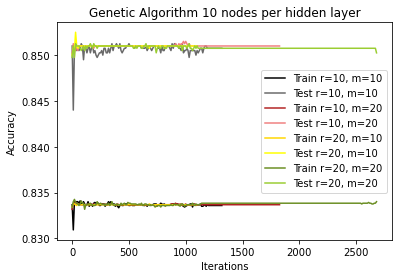

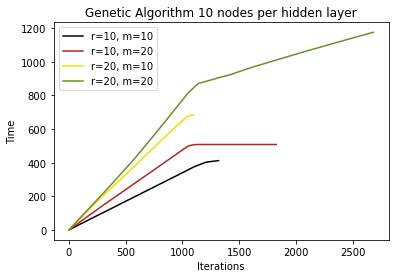

0.8514999999999999
0.85125
0.85125
0.8514999999999999


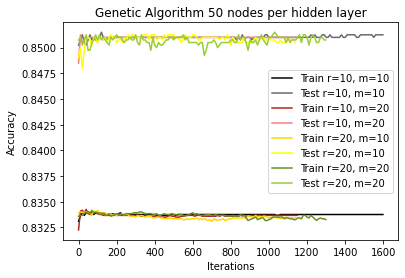

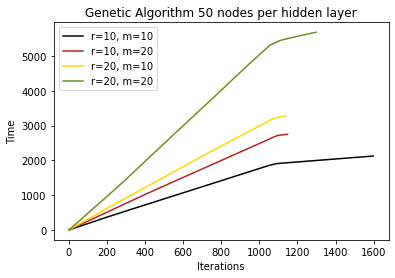

In [11]:
GA_INFILE = ['./NN_OUTPUT/GA_50_10_10_LOG_10.txt',
             './NN_OUTPUT/GA_50_10_10_LOG_50.txt',
             './NN_OUTPUT/GA_50_10_20_LOG_10.txt',
             './NN_OUTPUT/GA_50_10_20_LOG_50.txt',
             './NN_OUTPUT/GA_50_20_10_LOG_10.txt',
             './NN_OUTPUT/GA_50_20_10_LOG_50.txt',
             './NN_OUTPUT/GA_50_20_20_LOG_10.txt',
             './NN_OUTPUT/GA_50_20_20_LOG_50.txt']
FILES=[GA_INFILE[0],GA_INFILE[2],GA_INFILE[4],GA_INFILE[6]]
y_train_plot = []
y_test_plot = []
y_time_plot = []
x_plot = []
legends =['Train r=10, m=10', 'Test r=10, m=10',
          'Train r=10, m=20', 'Test r=10, m=20',
          'Train r=20, m=10', 'Test r=20, m=10',
          'Train r=20, m=20', 'Test r=20, m=20']

legends2 = ['r=10, m=10', 'r=10, m=20', 'r=20, m=10','r=20, m=20']
color1=['black','firebrick','gold','olivedrab', 'steelblue']
color2=['dimgray','lightcoral','yellow','yellowgreen', 'lightskyblue']
'''
color1=['#ff0000','#b0ff00','#00bfff','#bf00ff', '#000000']
color2=['#ff8000','#40ff00','#0040ff','#8f00ff', '#404040']
'''
#len(FILES)
for file in range(len(FILES)):

    trials = 5
    x_axis = []
    y_train_axis = []
    y_test_axis = []
    y_time_axis = []
    trials_end = [0]
    maxdiff = 0
    maxdiff_index = 0
    with open(FILES[file], 'r') as f:
        data = f.readlines()
        start = 1
        for n, line in enumerate(data[start:], 1):
            column=line.rstrip().split(",")
            x_axis.append(float(column[0]))
            y_train_axis.append(float(column[4]))
            y_test_axis.append(float(column[6]))
            if column[-1]=='optimal':
                trials_end.append(n)
                y_time_axis.append(float(column[-2]))
            else:
                y_time_axis.append(float(column[-1]))

        for i in range(len(trials_end)-1):
            diff=trials_end[i+1]-trials_end[i]
            if maxdiff<diff:
                maxdiff=diff
                maxdiff_index=trials_end[i]

        y_train=[]
        y_test=[]
        y_time=[]

        for i in range(trials-1):
            y_train.append(y_train_axis[trials_end[i]:trials_end[i + 1]] + [y_train_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_test.append(y_test_axis[trials_end[i]:trials_end[i + 1]] + [y_test_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_time.append(y_time_axis[trials_end[i]:trials_end[i + 1]] + [y_time_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])        
        
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        y_time = np.array(y_time)
        x=np.array(x_axis[maxdiff_index:maxdiff_index+maxdiff])
        y_train = np.mean(y_train, axis=0)
        y_test = np.mean(y_test, axis=0)
        y_time = np.mean(y_time, axis=0)
        x_plot.append(x)
        y_train_plot.append(y_train)
        y_test_plot.append(y_test)
        y_time_plot.append(y_time)
        print(max(y_test_plot[file]))

        
        plt.figure(1) 
        plt.plot(x_plot[file], y_train_plot[file], color1[file])
        plt.plot(x_plot[file], y_test_plot[file], color2[file])
        plt.title('Genetic Algorithm 10 nodes per hidden layer')
        plt.ylabel('Accuracy')
        plt.xlabel('Iterations')
        plt.legend(legends)
        
        plt.figure(2) 
        plt.plot(x_plot[file], y_time_plot[file], color1[file])
        plt.title('Genetic Algorithm 10 nodes per hidden layer')
        plt.ylabel('Time')
        plt.xlabel('Iterations')
        plt.legend(legends2)
plt.show()

FILES=[GA_INFILE[1],GA_INFILE[3],GA_INFILE[5],GA_INFILE[7]]
y_train_plot = []
y_test_plot = []
y_time_plot = []
x_plot = []
legends =['Train r=10, m=10', 'Test r=10, m=10',
          'Train r=10, m=20', 'Test r=10, m=20',
          'Train r=20, m=10', 'Test r=20, m=10',
          'Train r=20, m=20', 'Test r=20, m=20']

legends2 = ['r=10, m=10', 'r=10, m=20', 'r=20, m=10','r=20, m=20']
color1=['black','firebrick','gold','olivedrab', 'steelblue']
color2=['dimgray','lightcoral','yellow','yellowgreen', 'lightskyblue']
'''
color1=['#ff0000','#b0ff00','#00bfff','#bf00ff', '#000000']
color2=['#ff8000','#40ff00','#0040ff','#8f00ff', '#404040']
'''
#len(FILES)
for file in range(len(FILES)):

    trials = 5
    x_axis = []
    y_train_axis = []
    y_test_axis = []
    y_time_axis = []
    trials_end = [0]
    maxdiff = 0
    maxdiff_index = 0
    with open(FILES[file], 'r') as f:
        data = f.readlines()
        start = 1
        for n, line in enumerate(data[start:], 1):
            column=line.rstrip().split(",")
            x_axis.append(float(column[0]))
            y_train_axis.append(float(column[4]))
            y_test_axis.append(float(column[6]))
            if column[-1]=='optimal':
                trials_end.append(n)
                y_time_axis.append(float(column[-2]))
            else:
                y_time_axis.append(float(column[-1]))

        for i in range(len(trials_end)-1):
            diff=trials_end[i+1]-trials_end[i]
            if maxdiff<diff:
                maxdiff=diff
                maxdiff_index=trials_end[i]

        y_train=[]
        y_test=[]
        y_time=[]

        for i in range(trials-1):
            y_train.append(y_train_axis[trials_end[i]:trials_end[i + 1]] + [y_train_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_test.append(y_test_axis[trials_end[i]:trials_end[i + 1]] + [y_test_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_time.append(y_time_axis[trials_end[i]:trials_end[i + 1]] + [y_time_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])        
        
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        y_time = np.array(y_time)
        x=np.array(x_axis[maxdiff_index:maxdiff_index+maxdiff])
        y_train = np.mean(y_train, axis=0)
        y_test = np.mean(y_test, axis=0)
        y_time = np.mean(y_time, axis=0)
        x_plot.append(x)
        y_train_plot.append(y_train)
        y_test_plot.append(y_test)
        y_time_plot.append(y_time)
        print(max(y_test_plot[file]))

        
        plt.figure(1) 
        plt.plot(x_plot[file], y_train_plot[file], color1[file])
        plt.plot(x_plot[file], y_test_plot[file], color2[file])
        plt.title('Genetic Algorithm 50 nodes per hidden layer')
        plt.ylabel('Accuracy')
        plt.xlabel('Iterations')
        plt.legend(legends)
        
        plt.figure(2) 
        plt.plot(x_plot[file], y_time_plot[file], color1[file])
        plt.title('Genetic Algorithm 50 nodes per hidden layer')
        plt.ylabel('Time')
        plt.xlabel('Iterations')
        plt.legend(legends2)
plt.show()



0.8835000000000001
0.84941666666675
0.8441666666665
0.8338333333335


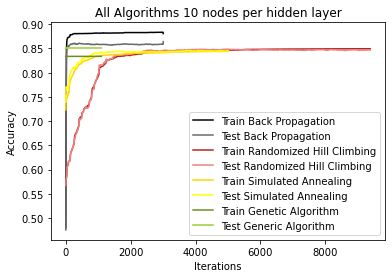

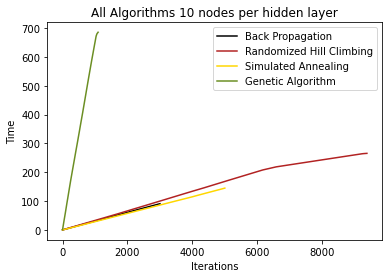

In [12]:
ALL_INFILE = ['./NN_OUTPUT/BACKPROP_LOG_10.txt',
              './NN_OUTPUT/RHC_LOG_10.txt',
              './NN_OUTPUT/SA0.7_LOG_10.txt',
              './NN_OUTPUT/GA_50_20_10_LOG_10.txt']
FILES = ALL_INFILE
y_train_plot = []
y_test_plot = []
y_time_plot = []
x_plot = []
legends =['Train Back Propagation', 'Test Back Propagation',
          'Train Randomized Hill Climbing', 'Test Randomized Hill Climbing',
          'Train Simulated Annealing', 'Test Simulated Annealing',
          'Train Genetic Algorithm', 'Test Generic Algorithm']
legends2 =['Back Propagation',
          'Randomized Hill Climbing',
          'Simulated Annealing',
          'Genetic Algorithm']
color1=['black','firebrick','gold','olivedrab', 'steelblue']
color2=['dimgray','lightcoral','yellow','yellowgreen', 'lightskyblue']
for file in range(len(ALL_INFILE)):

    trials = 5
    x_axis = []
    y_train_axis = []
    y_test_axis = []
    y_time_axis = []
    trials_end = [0]
    maxdiff = 0
    maxdiff_index = 0
    with open(FILES[file], 'r') as f:
        data = f.readlines()
        start = 1
        for n, line in enumerate(data[start:], 1):
            column=line.rstrip().split(",")
            x_axis.append(float(column[0]))
            y_train_axis.append(float(column[4]))
            y_test_axis.append(float(column[6]))
            if column[-1]=='optimal':
                trials_end.append(n)
                y_time_axis.append(float(column[-2]))
            else:
                y_time_axis.append(float(column[-1]))

        for i in range(len(trials_end)-1):
            diff=trials_end[i+1]-trials_end[i]
            if maxdiff<diff:
                maxdiff=diff
                maxdiff_index=trials_end[i]

        y_train=[]
        y_test=[]
        y_time=[]

        for i in range(trials-1):
            y_train.append(y_train_axis[trials_end[i]:trials_end[i + 1]] + [y_train_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_test.append(y_test_axis[trials_end[i]:trials_end[i + 1]] + [y_test_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])
            y_time.append(y_time_axis[trials_end[i]:trials_end[i + 1]] + [y_time_axis[trials_end[i + 1] - 1] \
                                for j in range(maxdiff - (trials_end[i + 1] - trials_end[i]))])        
        
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        y_time = np.array(y_time)
        x=np.array(x_axis[maxdiff_index:maxdiff_index+maxdiff])
        y_train = np.mean(y_train, axis=0)
        y_test = np.mean(y_test, axis=0)
        y_time = np.mean(y_time, axis=0)
        x_plot.append(x)
        y_train_plot.append(y_train)
        y_test_plot.append(y_test)
        y_time_plot.append(y_time)
        print(max(y_train_plot[file]))

        
        plt.figure(1) 
        plt.plot(x_plot[file], y_train_plot[file], color1[file])
        plt.plot(x_plot[file], y_test_plot[file], color2[file])
        plt.title('All Algorithms 10 nodes per hidden layer')
        plt.ylabel('Accuracy')
        plt.xlabel('Iterations')
        plt.legend(legends)
        
        plt.figure(2) 
        plt.plot(x_plot[file], y_time_plot[file], color1[file])
        plt.title('All Algorithms 10 nodes per hidden layer')
        plt.ylabel('Time')
        plt.xlabel('Iterations')
        plt.legend(legends2)
plt.show()

